Importo librerías:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Defino constantes y parámetros

In [10]:
b = 1
a = 1

k_points = 50     # Puntos de muestreo
k_f = 2*np.pi     # Punto máximo a graficar, escojo este porque justamente corta por la mitad los primeros puntos de interferencia constructiva

N = [1, 2, 5, 10]

Declaro la función de la sección eficaz diferencial por unidad de núcleos

In [3]:
def d_sigma(x, y, z, N):

    return b**2 * ( (np.sin(a*x*N/2)**2 / np.sin(a*x/2)**2) * (np.sin(a*y*N/2)**2 / np.sin(a*y/2)**2) * (np.sin(a*z*N/2)**2 / np.sin(a*z/2)**2) ) / N**3

Discretizo el espacio recíproco

In [4]:
k_x = np.linspace(-k_f, k_f, k_points)
k_y = np.linspace(-k_f, k_f, k_points)
k_z = np.linspace(-k_f, k_f, k_points)

Creo la malla 3D de todos los puntos $(kx, ky, kz)$

In [5]:
KX, KY, KZ = np.meshgrid(k_x, k_y, k_z)

A todos los puntos $(kx, ky, kz)$ les asigno un valor según la función de la sección eficaz diferencial por unidad de núcleos

In [6]:
SIGMA = d_sigma(KX, KY, KZ, 5)

Como vamos a graficar con scatter, es decir, vamos a graficar una esfera pequeña por cada punto $(kx,ky,kz)$, tenemos que aplanar nuestras mallas para que todos los valores estén en un solo vector unidimensional

In [7]:
kx = KX.ravel()
ky = KY.ravel()
kz = KZ.ravel()
sigma = SIGMA.ravel()

Para lograr visualizar mejor los puntos donde la sección eficaz diferencial es alta, no solo vamos a colorear, también vamos a cambiar el tamaño de los puntos en función del valor de la sección eficaz diferencial, para que los puntos donde es baja no nos estorben

In [8]:
if N==1:
    sizes = 10  # Se separa este caso porque con N=1, sigma es constante, entonces se indefine la normalización
else:
    sigma_norm = (sigma - sigma.min()) / (sigma.max() - sigma.min())   # Se normaliza para que sea más fácil jugar con los tamaños hasta que nos guste cómo se ve
    sizes =  50 * sigma_norm

Finalmente, grafico para distintos N's

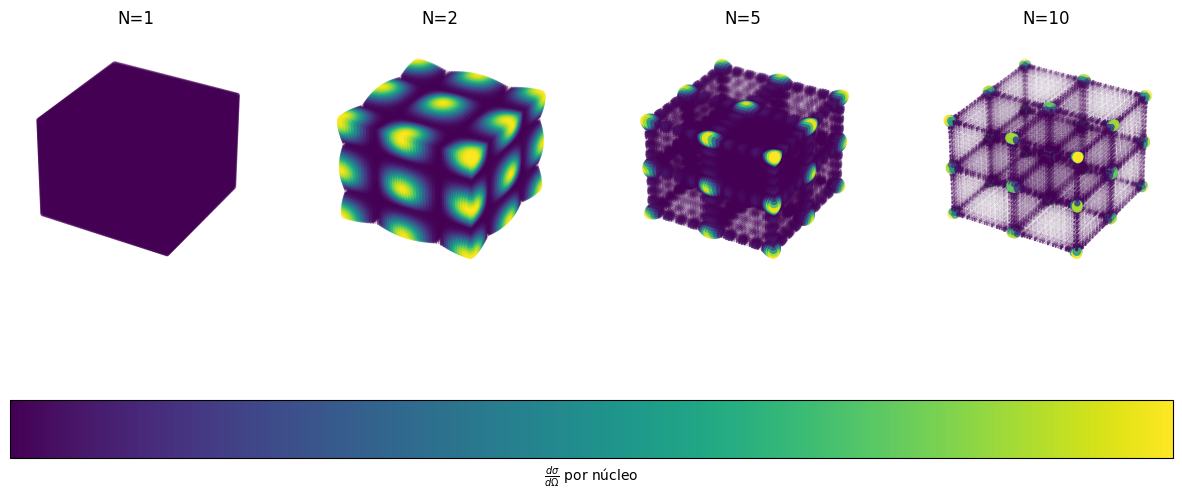

In [9]:
fig, axs = plt.subplots(1, len(N), figsize=(15,10), subplot_kw={'projection': '3d'})

for i in range(len(N)):
    
    SIGMA = d_sigma(KX, KY, KZ, N[i])
    sigma = SIGMA.ravel()

    if N[i]==1:
        sizes = 10 
    else:
        sigma_norm = (sigma - sigma.min()) / (sigma.max() - sigma.min()) 
        sizes =  50 * sigma_norm 
    
    p = axs[i].scatter(kx, ky, kz, c=sigma, s=sizes)
    
    axs[i].set_axis_off()

    axs[i].set_title(f"N={N[i]}")
    
cbar = fig.colorbar(p, ax=axs, orientation='horizontal', label=r"$\frac{d\sigma}{d\Omega}$ por núcleo")
cbar.set_ticks([])
plt.show()

De la figura se puede observar que para $N=1$ la sección eficaz diferencial es constante, esto tiene sentido porque al haber un solo núcleo, no hay interferencia.

Para $N=2$ ya se puede observar interferencia ya que los núcleos actúan como fuentes de ondas, entonces se crean puntos donde las ondas interfieren constructivamente y en esos puntos la sección eficaz diferencial es mayor.

Para $N=5$ y $N=10$ podemos ver que esos puntos donde hay interferencia contructiva se vuelven más concentrados, esto tiene sentido porque a mayor núcleos, más ondas interfieren entre sí.